## Artigo TCC completo aqui

https://drive.google.com/file/d/1Kj2EEjD67OWPTLw-Gs_LH_LpTxLHjM3-/view?usp=sharing

### Lendo Dados e transformando dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TCC/Consumo_cerveja.csv", decimal=',')
print(df.shape)
df.head()

(941, 7)


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [ ]:
df['Data'].dropna()

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
360    2015-12-27
361    2015-12-28
362    2015-12-29
363    2015-12-30
364    2015-12-31
Name: Data, Length: 365, dtype: object

In [ ]:
map = {
    'Temperatura Media (C)' : 'temp_media',
    'Temperatura Minima (C)' : 'temp_min',
    'Temperatura Maxima (C)' : 'temp_max',
    'Precipitacao (mm)' : 'precip(mm)',
    'Final de Semana' : 'FDS',
    'Consumo de cerveja (litros)' : 'Consumo'
}

df = df.rename(columns=map)
df.head()

,Data,temp_media,temp_min,temp_max,precip(mm),FDS,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [ ]:
df = df.dropna()
df.isnull().sum()

Data          0
temp_media    0
temp_min      0
temp_max      0
precip(mm)    0
FDS           0
Consumo       0
dtype: int64

In [ ]:
df['Consumo'] = df['Consumo'].astype(float)

In [ ]:
df.dtypes

Data           object
temp_media    float64
temp_min      float64
temp_max      float64
precip(mm)    float64
FDS           float64
Consumo       float64
dtype: object

In [ ]:
df.describe().round(2)

,temp_media,temp_min,temp_max,precip(mm),FDS,Consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


In [ ]:
df.shape

(365, 7)

In [ ]:
df.corr()

,temp_media,temp_min,temp_max,precip(mm),FDS,Consumo
temp_media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
precip(mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
FDS,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


### Iniciando Análises

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

A base se trata de uma série temporal onde mostra o consumo de cerveja por dia

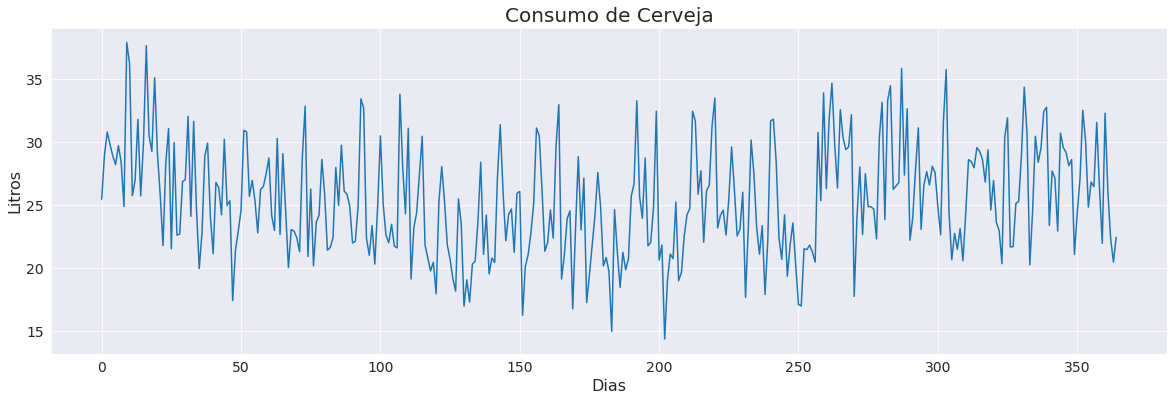

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = df['Consumo'].plot(fontsize=14)

Comparação da quantidade em litros de bebida consumida em litros quando é (1) e não é (0) final de semana

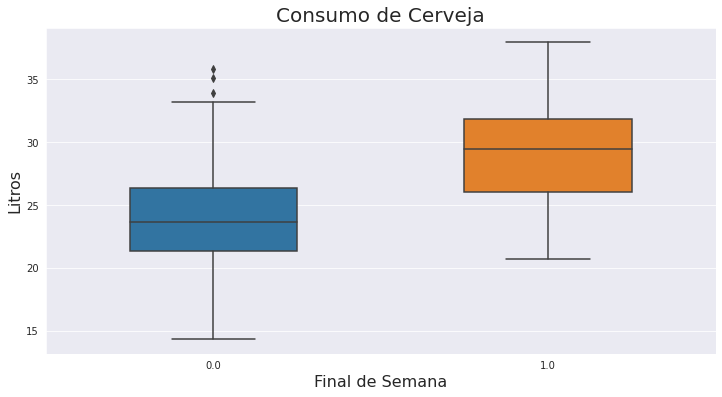

In [ ]:
ax = sns.boxplot(y='Consumo', x='FDS', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
plt.show()

Distribuição do consumo de cerveja

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Consumo')

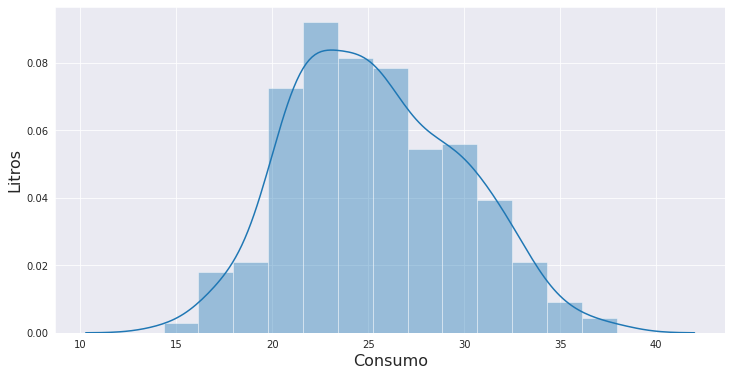

In [ ]:
ax = sns.distplot(df['Consumo'])
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Consumo', fontsize=16)

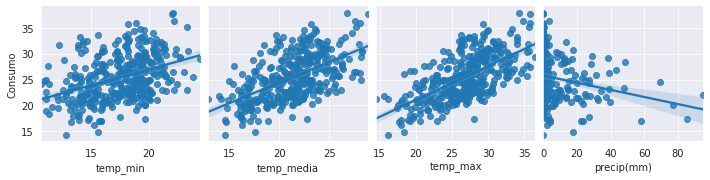

In [ ]:
ax = sns.pairplot(df, y_vars='Consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'precip(mm)'], kind='reg', )
#ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.2)
ax

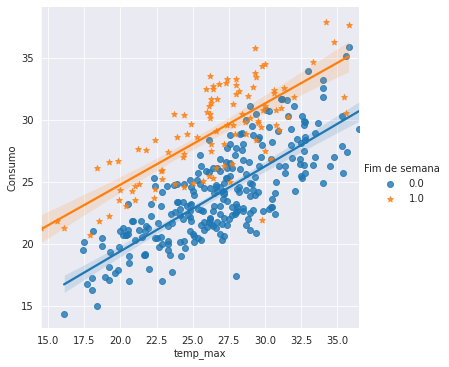

In [ ]:
ax = sns.lmplot(x='temp_max', y='Consumo', data=df, hue='FDS', markers=['o', '*'], legend=False)
ax.add_legend(title='Fim de semana')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['temp_min', 'temp_max', 'temp_media', 'FDS', 'precip(mm)']]
y = df['Consumo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(255, 5)
(110, 5)
(255,)
(110,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('R² = %.2f' % model.score(X_train, y_train))

R² = 0.71


In [ ]:
print('R² = %.2f' % metrics.r2_score(y_test, y_pred))

R² = 0.74


In [ ]:
import numpy as np

In [ ]:
df['log_consumo'] = np.log(df['Consumo'])
df['log_temp_media'] = np.log(df['temp_media'])
df['log_temp_max'] = np.log(df['temp_max'])
df['log_temp_min'] = np.log(df['temp_min'])
df['log_precip(mm)'] = np.log(df['precip(mm)']+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


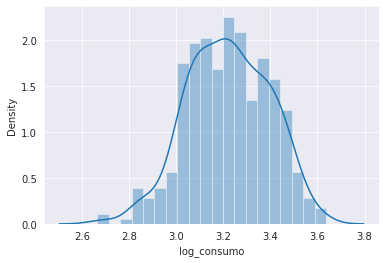

In [ ]:
sns.distplot(df['log_consumo'], bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


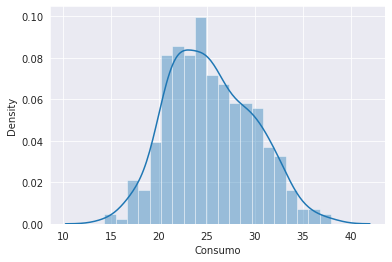

In [ ]:
sns.distplot(df['Consumo'], bins=20)

In [ ]:
df.describe().round(2)

,temp_media,temp_min,temp_max,precip(mm),FDS,Consumo,log_consumo,log_temp_media,log_temp_max,log_temp_min,log_precip(mm)
count,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40,3.22,3.04,3.27,2.85,0.80
std,3.18,2.83,4.32,12.42,0.45,4.40,0.17,0.15,0.17,0.17,1.23
min,12.90,10.60,14.50,0.00,0.00,14.34,2.66,2.56,2.67,2.36,0.00
25%,19.02,15.30,23.80,0.00,0.00,22.01,3.09,2.95,3.17,2.73,0.00
50%,21.38,17.90,26.90,0.00,0.00,24.87,3.21,3.06,3.29,2.88,0.00
75%,23.28,19.60,29.40,3.20,1.00,28.63,3.35,3.15,3.38,2.98,1.44
max,28.86,24.50,36.50,94.80,1.00,37.94,3.64,3.36,3.60,3.20,4.56


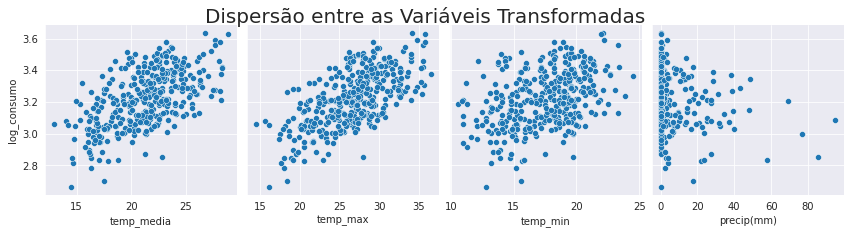

In [ ]:
ax = sns.pairplot(df, y_vars='log_consumo', x_vars=['temp_media', 'temp_max', 'temp_min', 'precip(mm)'], height=3)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

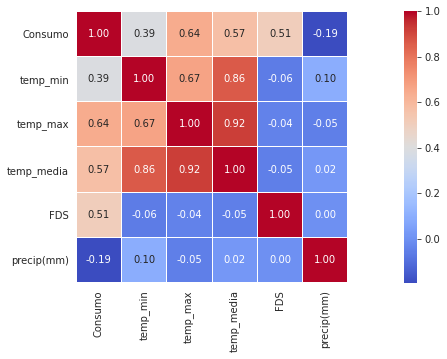

In [ ]:
def correlacao(Df):
    fig, axis1 = plt.subplots(1,1, figsize=(20,5))
    sns.heatmap(Df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0, square='true', linecolor='white', annot=True)
    plt.show()

correlacao(df[['Consumo', 'temp_min', 'temp_max', 'temp_media', 'FDS', 'precip(mm)']])

In [ ]:
X = df[['log_temp_min', 'log_temp_max', 'log_temp_media', 'FDS', 'log_precip(mm)']]
y = df['log_consumo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(255, 5)
(110, 5)
(255,)
(110,)


### Seleção de variáveis

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train_const = sm.add_constant(X_train)

In [ ]:
X_train_const.head()

,const,log_temp_min,log_temp_max,log_temp_media,FDS,log_precip(mm)
268,1.0,2.901422,3.214868,3.024320,1.0,3.387774
231,1.0,2.694627,2.975530,2.785011,0.0,0.000000
157,1.0,2.766319,3.265759,3.026261,1.0,0.000000
19,1.0,3.148453,3.572346,3.320710,0.0,0.470004
147,1.0,2.821379,3.144152,2.921009,0.0,1.029619


In [ ]:
X_train_const.dtypes

const             float64
log_temp_min      float64
log_temp_max      float64
log_temp_media    float64
FDS               float64
log_precip(mm)    float64
dtype: object

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_const, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            log_consumo   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           5.07e-63
Time:                        02:03:17   Log-Likelihood:                 244.16
No. Observations:                 255   AIC:                            -476.3
Df Residuals:                     249   BIC:                            -455.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9426      0.120      7.

In [ ]:
#retirando a variável temp_min por apresentar um P>|t| maior do 0.05

X = df[['log_temp_max', 'log_temp_media', 'FDS', 'log_precip(mm)']]
y = df['log_consumo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_const = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_const, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            log_consumo   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           4.54e-64
Time:                        02:03:17   Log-Likelihood:                 244.01
No. Observations:                 255   AIC:                            -478.0
Df Residuals:                     250   BIC:                            -460.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9391      0.119      7.

In [ ]:
#retirada a variável precip(mm) por apresentar baixo coef de correlação

X = df[['log_temp_max', 'log_temp_media', 'FDS']]
y = df['log_consumo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_const = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_const, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            log_consumo   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           2.08e-62
Time:                        02:03:17   Log-Likelihood:                 237.35
No. Observations:                 255   AIC:                            -466.7
Df Residuals:                     251   BIC:                            -452.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8863      0.121      7.

In [ ]:
X = df[['temp_max', 'FDS', 'precip(mm)']]
y = df['Consumo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_const = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_const, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     200.1
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           2.88e-66
Time:                        02:03:17   Log-Likelihood:                -574.68
No. Observations:                 255   AIC:                             1157.
Df Residuals:                     251   BIC:                             1172.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3962      0.938      6.817      0.0

### Treinamento do modelo

In [ ]:
'''Variaveis normais'''
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("R² = %.3f" % modelo.score(X_train, y_train))
y_pred = modelo.predict(X_test)
print("R² = %.3f" % metrics.r2_score(y_test, y_pred))

R² = 0.705
R² = 0.749


In [ ]:
modelo.intercept_

6.396174228697234

In [ ]:
modelo.coef_

array([ 0.66752499,  5.33497184, -0.05305718])

In [ ]:
modelo.singular_

array([184.29242541,  68.57500706,   6.91316949])

In [ ]:
X_train.columns

Index(['temp_max', 'FDS', 'precip(mm)'], dtype='object')

In [ ]:
index = ['Intecepto', 'temp_max', 'FDS', 'precip(mm)']

Obtendo os coeficientes de regressão
Os coeficientes de regressão  β2  e  β3  são conhecidos como coeficientes parciais de regressão ou coeficientes parciais angulares.

Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares  β2  e  β3  medem as elasticidades de Y em relação a  X2  e  X3 , isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em  X2  e  X3 .

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intecepto,6.396174
temp_max,0.667525
FDS,5.334972
precip(mm),-0.053057


Interpretação dos Coeficientes Estimados
Intercepto → Excluindo o efeito das variáveis explicativas ( X2=X3=X4=0 ) o efeito médio no consumo seria de 6,36 L.

Temp_Max → Mantendo-se o valor de  X3 e X4  (FDS e precip(mm)) constante, um acréscimo de 1 ºC na temperatura máxima gera, em média, um acréscimo de 0,66 L no consumo.

FDS → Mantendo-se o valor de  X2 e X4  (temp_max e precip(mm)) constante, caso seja fim de semana, gera, em média, um acréscimo de 5,33 L no consumo.

precip(mm) → Mantendo-se o valor de  X2 e X3  (temp_max e FDS) constante, um acréscimo de 1mm de preciptação de chuva gera, em média, um decréscimo de 0,05 L no consumo.

In [ ]:
y_pred_train = modelo.predict(X_train)

In [ ]:
print('R² = %.4f' % metrics.r2_score(y_train, y_pred_train))

R² = 0.7052


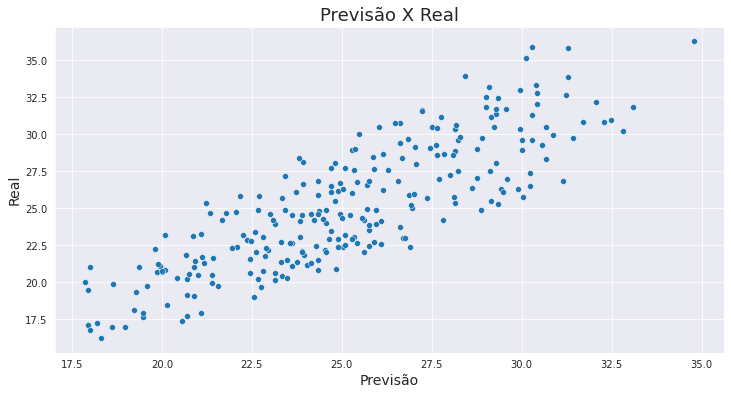

In [ ]:
ax = sns.scatterplot(x=y_pred_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Previsão', fontsize=14)
ax.set_ylabel('Real', fontsize=14)
ax

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
print('R² = %.4f' % metrics.r2_score(y_test, y_pred))

R² = 0.7487


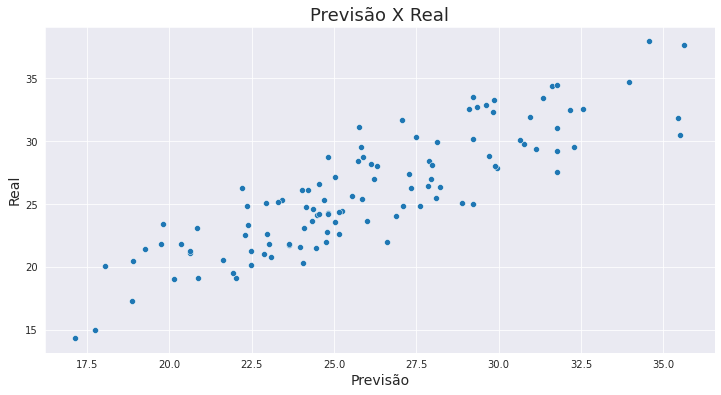

In [ ]:
ax = sns.scatterplot(x=y_pred, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Previsão', fontsize=14)
ax.set_ylabel('Real', fontsize=14)
ax

In [ ]:
y_prediction = pd.DataFrame(y_pred, columns=['Resultados'])
y_prediction

,Resultados
0,25.554141
1,27.071310
2,28.118127
3,21.615744
4,27.324625
...,...
105,24.018834
106,24.085587
107,29.833773
108,22.283269


In [ ]:
df_test = pd.concat([X_test, y_test], axis=1, join="inner")
df_prediction = pd.concat([df_test.reset_index(), y_prediction], axis=1, join="inner")

map = {
    "precip(mm)": "precip",
    "Consumo": "Real",
    "Resultados": "Previsao"
}

df_prediction.rename(columns=map, inplace=True)
#df_prediction.to_clipboard(excel=True)

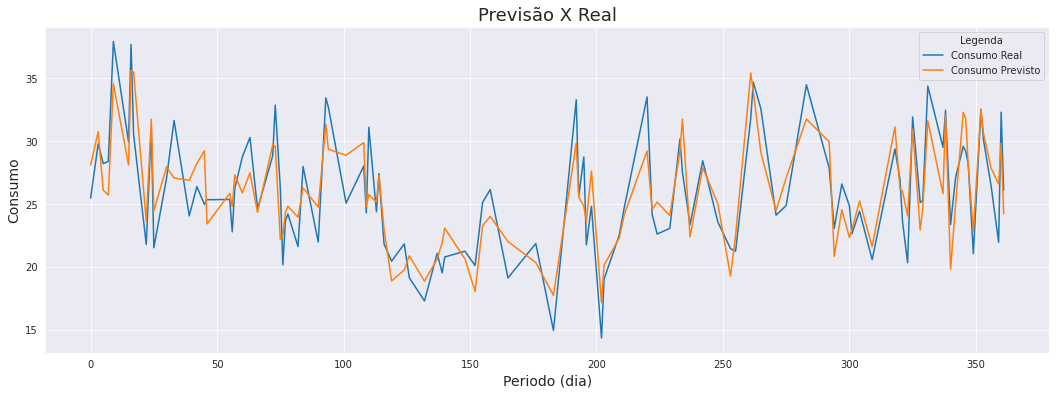

In [ ]:
ax = sns.lineplot(data=df_prediction, x="index", y="Real")
ax = sns.lineplot(data=df_prediction, x="index", y="Previsao")
ax.figure.set_size_inches(18, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Periodo (dia)', fontsize=14)
ax.set_ylabel('Consumo', fontsize=14)
plt.legend(title='Legenda', labels=['Consumo Real', 'Consumo Previsto'], loc="upper right")
ax

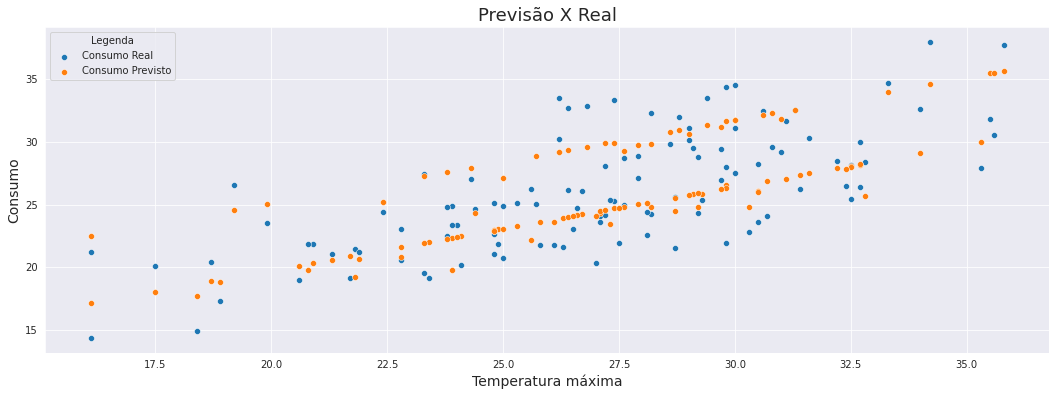

In [ ]:
ax = sns.scatterplot(data=df_prediction, x="temp_max", y="Real")
ax = sns.scatterplot(data=df_prediction, x="temp_max", y="Previsao")
ax.figure.set_size_inches(18, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Temperatura máxima', fontsize=14)
ax.set_ylabel('Consumo', fontsize=14)
plt.legend(title='Legenda', labels=['Consumo Real', 'Consumo Previsto'], loc="upper left")
ax

In [ ]:
df_prediction.head()

,index,temp_max,FDS,precip,Real,Previsao
0,193,28.7,0.0,0.0,25.640,25.554141
1,33,31.1,0.0,1.6,31.655,27.071310
2,15,32.7,0.0,2.0,29.938,28.118127
3,309,22.8,0.0,0.0,20.575,21.615744
4,57,31.4,0.0,0.6,26.241,27.324625


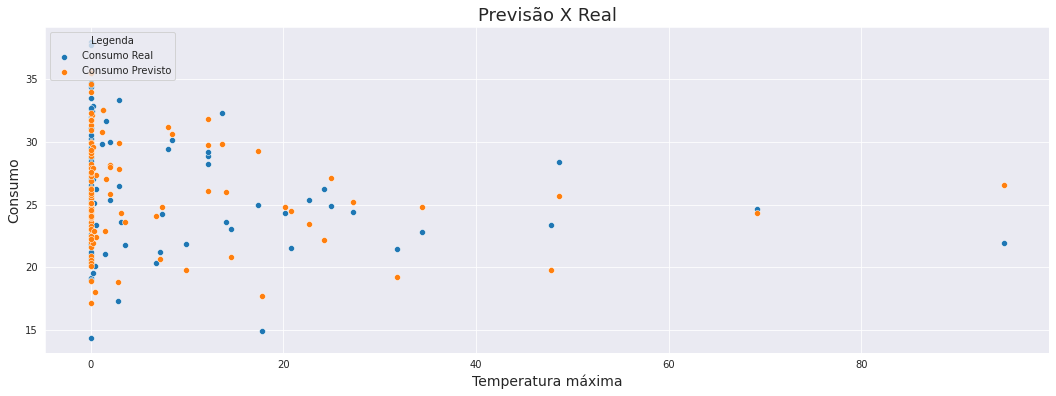

In [ ]:
ax = sns.scatterplot(data=df_prediction, x="precip", y="Real")
ax = sns.scatterplot(data=df_prediction, x="precip", y="Previsao")
ax.figure.set_size_inches(18, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Temperatura máxima', fontsize=14)
ax.set_ylabel('Consumo', fontsize=14)
plt.legend(title='Legenda', labels=['Consumo Real', 'Consumo Previsto'], loc="upper left")
ax

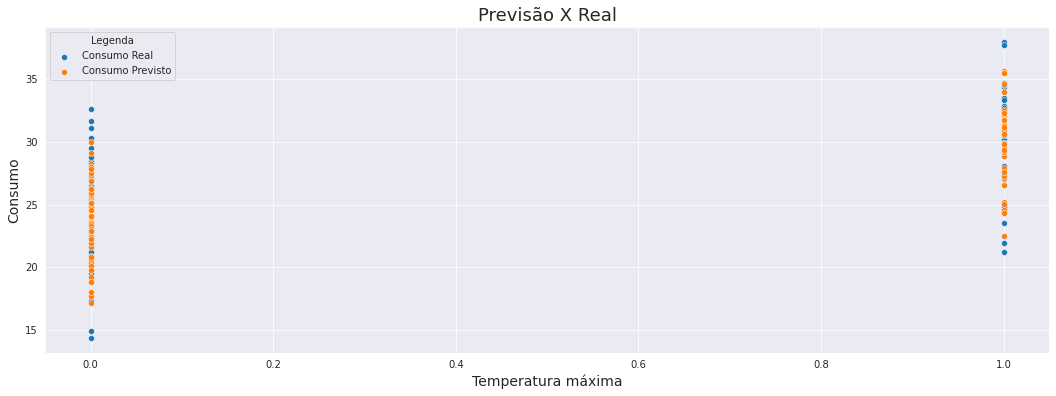

In [ ]:
ax = sns.scatterplot(data=df_prediction, x="FDS", y="Real")
ax = sns.scatterplot(data=df_prediction, x="FDS", y="Previsao")
ax.figure.set_size_inches(18, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Temperatura máxima', fontsize=14)
ax.set_ylabel('Consumo', fontsize=14)
plt.legend(title='Legenda', labels=['Consumo Real', 'Consumo Previsto'], loc="upper left")
ax

In [ ]:
#df_prediction.to_csv(decimal=",")